Read in building.jpg. Shape: (683, 1024)


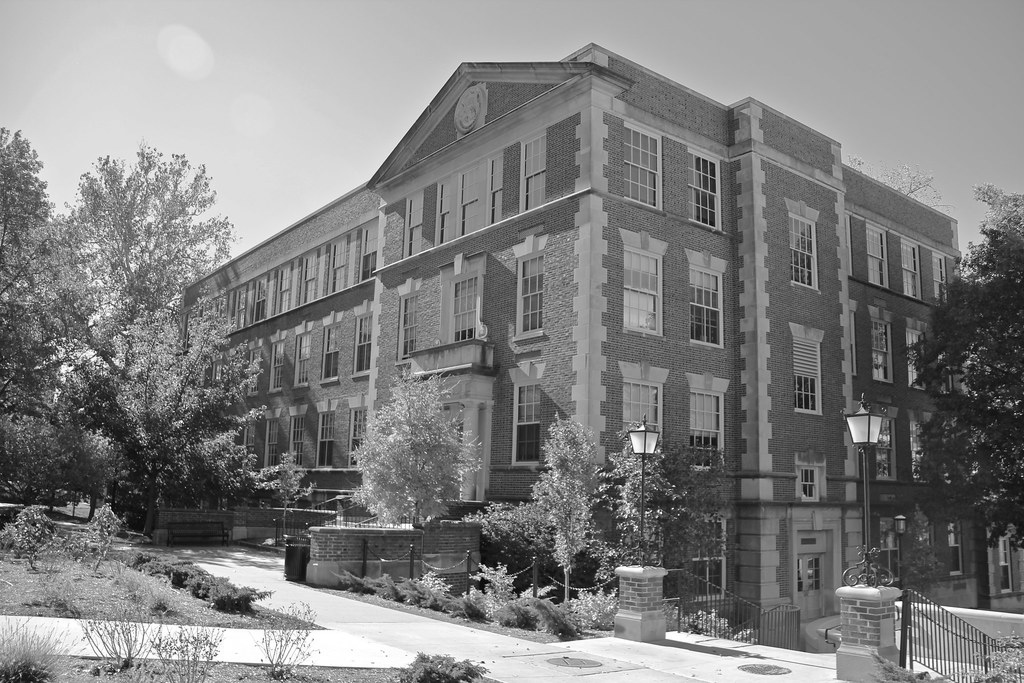

In [2]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt


image_path = 'building.jpg'

# Read in image as grayscale and store as an array
image = np.asarray(Image.open(image_path).convert('L'))
print(f'Read in {image_path}. Shape: {image.shape}')
width = image.shape[1]
height = image.shape[0]
Image.fromarray(image)

## Scale space

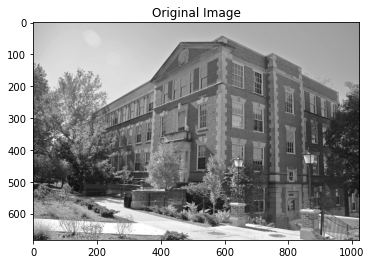

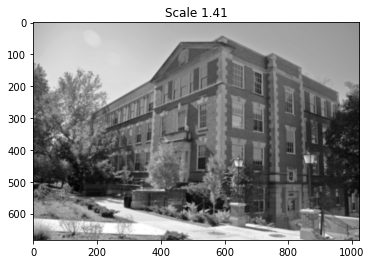

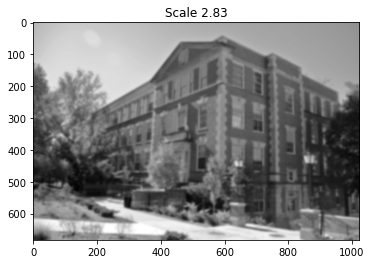

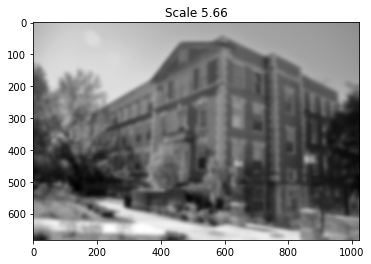

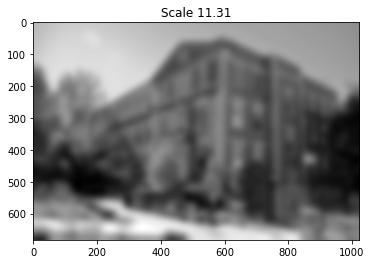

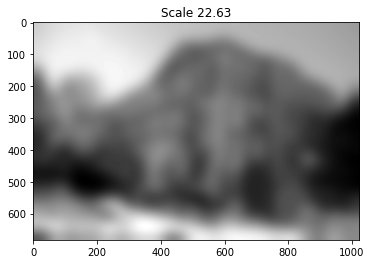

In [48]:
from scipy.ndimage import gaussian_filter
from matplotlib import pyplot as plt

scales = 5
scale_space = []
sigmas = [np.sqrt(2)]

# Show original image
plt.figure()
plt.title('Original Image')
plt.imshow(image, cmap='gray')

for i in np.arange(scales):
    scale_space.append(gaussian_filter(image, sigmas[i]))
    sigmas.append(2 * sigmas[i])

    # Show scale space within octave
    plt.figure()
    plt.title(f'Scale {sigmas[i]:.2f}')
    plt.imshow(scale_space[i], cmap='gray')

## Difference of Gaussians

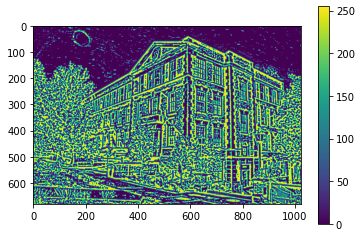

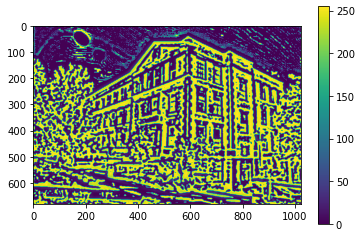

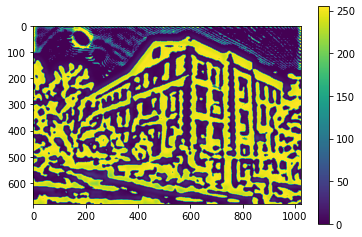

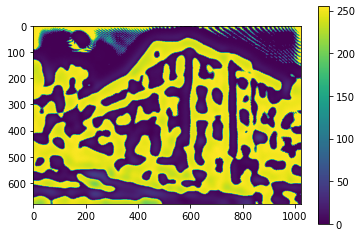

In [49]:
DoGs = []

for i in np.arange(scales - 1):
    DoGs.append(scale_space[i] - scale_space[i + 1])
    plt.figure()
    plt.imshow(DoGs[i])
    plt.colorbar()

## Optima in DoG
Find the optima across three scales. If a pixel is the maximum or minimum out of its 26 neighbors, it is marked as a keypoint. The smallest and largest scales will not be used for keypoints. Why is that?

In [57]:
# Turn list of numpy arrays into 3D matrix, but only if it's a list
# Rerunning this cell will permute the axes if it's already a numpy array
if type(scale_space) == list:
    scale_space = np.dstack(scale_space)

rows, cols = scale_space.shape[0:2]

keypoints = []

for i in np.arange(1, scales - 1):
    for row in np.arange(1, rows - 1):
        for col in np.arange(1, cols - 1):
            candidate = scale_space[row, col, i]

            neighborhood = scale_space[row - 1:row + 2, 
                                       col - 1:col + 2, 
                                         i - 1:  i + 2]
            
            maxima = (candidate > neighborhood).sum()
            minima = (candidate < neighborhood).sum()

            if maxima == 26 or minima == 26:
               keypoints.append(np.array([row, col]))
                
            